In [37]:
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict

In [38]:
election_20 = pd.read_csv('../../data/2020election.csv')
election_20.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [39]:
election_12_16 = pd.read_csv('../../data/12-16election.csv')
election_12_16.head()

,Unnamed: 0,combined_fips,votes_dem_2016,votes_gop_2016,total_votes_2016,per_dem_2016,per_gop_2016,diff_2016,per_point_diff_2016,state_abbr,...,FIPS,total_votes_2012,votes_dem_2012,votes_gop_2012,county_fips,state_fips,per_dem_2012,per_gop_2012,diff_2012,per_point_diff_2012
0,0,2013,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2050,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2060,93003.0,130413.0,246588.0,0.377159,0.52887,37410,-0.151711,AK,...,2060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
election_20.columns

Index(['state', 'county', 'candidate', 'party', 'total_votes', 'won'], dtype='object')

In [41]:
elec_20_cols = ['county', 'party', 'total_votes']

In [42]:
election_12_16.columns

Index(['Unnamed: 0', 'combined_fips', 'votes_dem_2016', 'votes_gop_2016',
       'total_votes_2016', 'per_dem_2016', 'per_gop_2016', 'diff_2016',
       'per_point_diff_2016', 'state_abbr', 'county_name', 'FIPS',
       'total_votes_2012', 'votes_dem_2012', 'votes_gop_2012', 'county_fips',
       'state_fips', 'per_dem_2012', 'per_gop_2012', 'diff_2012',
       'per_point_diff_2012'],
      dtype='object')

In [43]:
elec_12_16_cols = ['county_name', 'per_dem_2012', 'per_gop_2012', 'per_dem_2016', 'per_gop_2016']

In [44]:
election_20 = election_20[elec_20_cols]
election_12_16 = election_12_16[elec_12_16_cols]

In [45]:
election_20

,county,party,total_votes
0,Kent County,DEM,44552
1,Kent County,REP,41009
2,Kent County,LIB,1044
3,Kent County,GRN,420
4,New Castle County,DEM,195034
...,...,...,...
32172,Maricopa County,WRI,1331
32173,Mohave County,REP,78535
32174,Mohave County,DEM,24831
32175,Mohave County,LIB,1302


In [46]:
election_12_16

,county_name,per_dem_2012,per_gop_2012,per_dem_2016,per_gop_2016
0,Alaska,NaN,NaN,0.377159,0.528870
1,Alaska,NaN,NaN,0.377159,0.528870
2,Alaska,NaN,NaN,0.377159,0.528870
3,Alaska,NaN,NaN,0.377159,0.528870
4,Alaska,NaN,NaN,0.377159,0.528870
...,...,...,...,...,...
3136,Sweetwater County,0.284955,0.682209,0.194046,0.729428
3137,Teton County,0.546936,0.427791,0.600608,0.321945
3138,Uinta County,0.192594,0.782326,0.149261,0.764187
3139,Washakie County,0.203017,0.770391,0.143203,0.783580


In [47]:
len(list(election_12_16['county_name'])), len(set(election_20['county']))

(3141, 3007)

In [48]:
county_party_cnt = defaultdict(lambda: defaultdict(int))

for index, rows in election_20.iterrows():
    county_party_cnt[rows['county']][rows['party']] += rows['total_votes']
    county_party_cnt[rows['county']]['TOTAL'] += rows['total_votes']

county_party_cnt

defaultdict(<function __main__.<lambda>()>,
            {'Kent County': defaultdict(int,
                         {'DEM': 237843,
                          'TOTAL': 459329,
                          'REP': 212356,
                          'LIB': 6657,
                          'GRN': 1448,
                          'WRI': 263,
                          'BAR': 31,
                          'CST': 490,
                          'ALI': 241}),
             'New Castle County': defaultdict(int,
                         {'DEM': 195034,
                          'TOTAL': 287633,
                          'REP': 88364,
                          'LIB': 2953,
                          'GRN': 1282}),
             'Sussex County': defaultdict(int,
                         {'REP': 125147,
                          'TOTAL': 222792,
                          'DEM': 93990,
                          'LIB': 2132,
                          'GRN': 789,
                          'WRI': 399,
              

In [49]:
np.nan

nan

In [50]:
per_dem_2020 = []
per_gop_2020 = []

for index, rows in election_12_16.iterrows():
    if rows['county_name'] in county_party_cnt:
        per_dem_2020.append(float(county_party_cnt[rows['county_name']]['DEM']) / county_party_cnt[rows['county_name']]['TOTAL'])
        per_gop_2020.append(float(county_party_cnt[rows['county_name']]['REP']) / county_party_cnt[rows['county_name']]['TOTAL'])
    else:
        print(f'Did not match {rows["county_name"]}')
        per_dem_2020.append(np.nan)
        per_gop_2020.append(np.nan)
        
election_12_16['per_dem_2020'] = per_dem_2020
election_12_16['per_gop_2020'] = per_gop_2020

election_12_16

Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Alaska
Did not match Hartford County
Did not match Litchfield County
Did not match New Haven County
Did not match New London County
Did not match Tolland County
Did not match Windham County
Did not match La Salle Parish
Did not match Barnstable County
Did not match Berkshire County
Did not match Bristol County
Did not match Dukes County
Did not match Hampden County
Did not match Nantucket County

,county_name,per_dem_2012,per_gop_2012,per_dem_2016,per_gop_2016,per_dem_2020,per_gop_2020
0,Alaska,NaN,NaN,0.377159,0.528870,NaN,NaN
1,Alaska,NaN,NaN,0.377159,0.528870,NaN,NaN
2,Alaska,NaN,NaN,0.377159,0.528870,NaN,NaN
3,Alaska,NaN,NaN,0.377159,0.528870,NaN,NaN
4,Alaska,NaN,NaN,0.377159,0.528870,NaN,NaN
...,...,...,...,...,...,...,...
3136,Sweetwater County,0.284955,0.682209,0.194046,0.729428,0.230260,0.736554
3137,Teton County,0.546936,0.427791,0.600608,0.321945,0.573365,0.396739
3138,Uinta County,0.192594,0.782326,0.149261,0.764187,0.169219,0.797277
3139,Washakie County,0.203017,0.770391,0.143203,0.783580,0.162263,0.808824


# Partisan Scale

Negative = Dem

Positive = GOP

In [51]:
def get_county_info(county):
    fd = False
    for index, rows in election_12_16.iterrows():
        regex = re.escape(county) + r" .*"
        metrics_yr = None
        if re.match(regex, rows['county_name']):
            metrics_yr = [rows['per_gop_2012'] - rows['per_dem_2012'],rows['per_gop_2016'] - rows['per_dem_2016'],rows['per_gop_2020'] - rows['per_dem_2020']]
            fd = True
            break

    if fd:
        return metrics_yr
    else:
        print("County Not Found")
        return None

In [54]:
lst = get_county_info('Teton')

In [59]:
def plot_county(county):
    plt.figure()
    plt.title(f'{county} Election Results 2012-2020')
    plt.plot(get_county_info(county))
    plt.xlabel('Years Since 2012')
    plt.ylabel('Partisanship')
    return plt

<module 'matplotlib.pyplot' from '/home/harry/.local/lib/python3.11/site-packages/matplotlib/pyplot.py'>

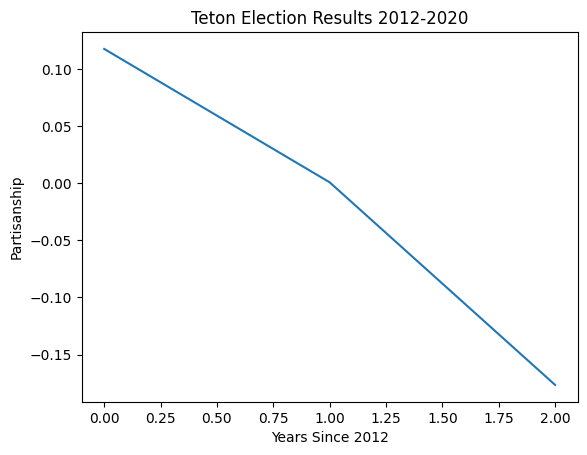

In [60]:
plot_county('Teton')